**Setup and Data Loading**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for clarity
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

**Load the cleaned dataset exported from MySQL**

In [14]:
df = pd.read_csv("customer_clean.csv")
df.head()

,customerID,gender,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,34,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,2,Month-to-month,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      1000 non-null   object 
 1   gender          1000 non-null   object 
 2   SeniorCitizen   1000 non-null   int64  
 3   tenure          1000 non-null   int64  
 4   Contract        1000 non-null   object 
 5   PaymentMethod   1000 non-null   object 
 6   MonthlyCharges  1000 non-null   float64
 7   TotalCharges    1000 non-null   float64
 8   Churn           1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [16]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000
unique,1000,2,NaN,NaN,3,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,NaN,Month-to-month,Electronic check,NaN,NaN,No
freq,1,511,NaN,NaN,552,312,NaN,NaN,742
mean,NaN,NaN,0.164000,32.257000,NaN,NaN,66.570550,2334.888150,NaN
std,NaN,NaN,0.370461,24.810331,NaN,NaN,29.892566,2286.053348,NaN
min,NaN,NaN,0.000000,1.000000,NaN,NaN,18.950000,19.000000,NaN
25%,NaN,NaN,0.000000,8.000000,NaN,NaN,42.250000,394.662500,NaN
50%,NaN,NaN,0.000000,29.000000,NaN,NaN,74.300000,1458.300000,NaN
75%,NaN,NaN,0.000000,56.000000,NaN,NaN,90.075000,3942.400000,NaN


**Overall Churn Distribution** - *How severe is churn overall?*

In [17]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
churn_distribution

Churn
No     74.2
Yes    25.8
Name: proportion, dtype: float64

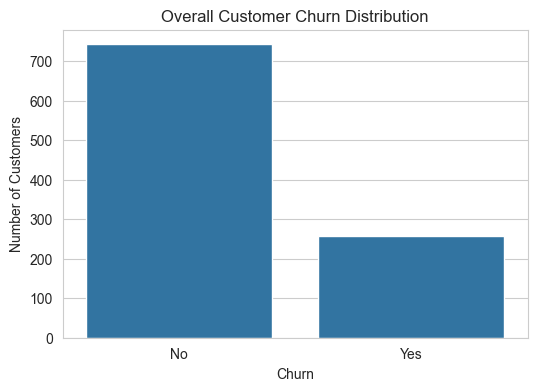

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Overall Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

**Tenure vs Churn Analysis** - *Do customers leave early or after long usage?*

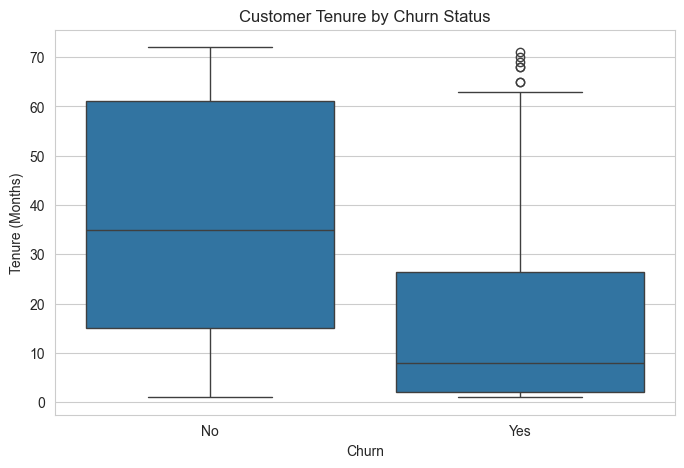

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Customer Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

**Monthly Charges vs Churn** - *Does pricing influence churn?*

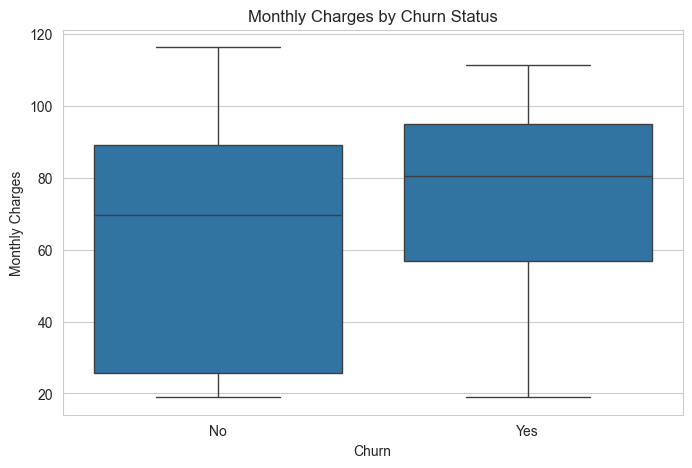

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

**Contract Type and Churn Relationship**

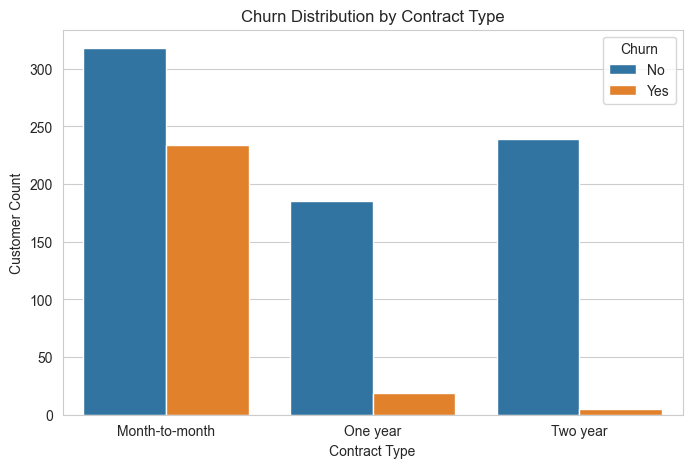

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn Distribution by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()

**Payment Method and Churn** - *Does payment friction impact retention?*

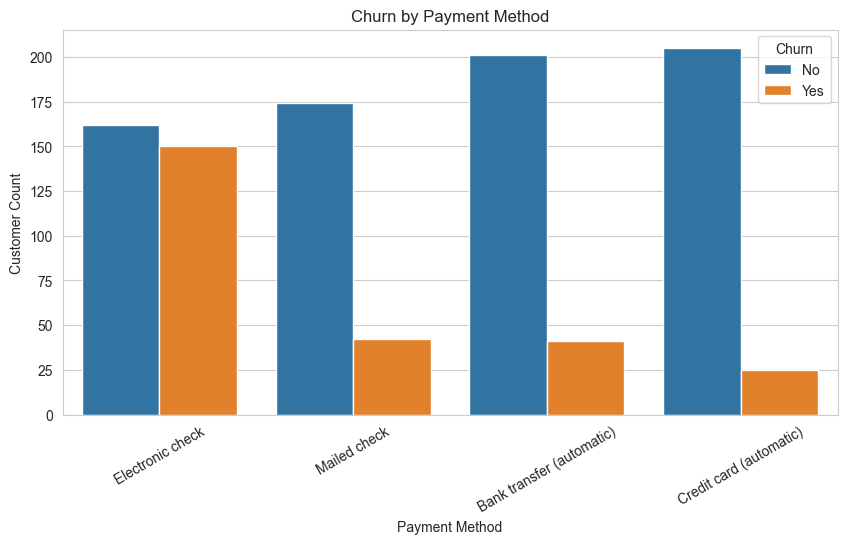

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.show()